# Week 02

## Citing open-source / found code

Sometimes the citation will be part of the code. Whenever you use the `import` command, I'll know the code is coming form somewhere else and it's easy to figure out where.

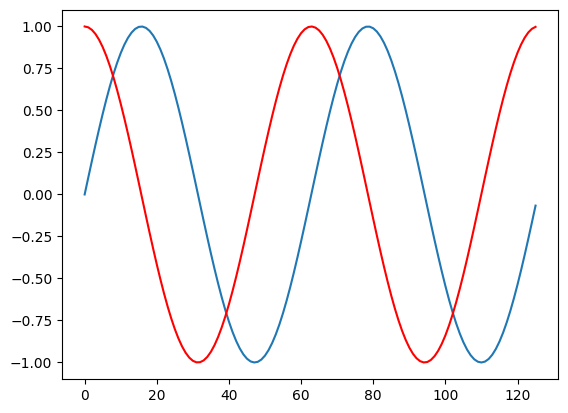

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.sin(np.arange(0, 4 * np.pi, .1)))
plt.plot(np.cos(np.arange(0, 4 * np.pi, .1)), c="r")
plt.show()

Other times the citation will have to be a little more explicit.

A link to the original code, repo, or stackoverflow answer is enough.

In [ ]:
import cv2
from scipy import fftpack
from imagehash import ImageHash

# Function for computing the perceptual hash of an image
# Based on code from the vframe project:
#   https://github.com/vframeio/vframe/blob/master/src/vframe/utils/im_utils.py#L37-L48
# which is based on code from the imagehash library:
#   https://github.com/JohannesBuchner/imagehash/blob/master/imagehash.py#L197

def phash(im, hash_size=8, highfreq_factor=4):
  wh = hash_size * highfreq_factor
  im = cv2.resize(im, (wh, wh), interpolation=cv2.INTER_NEAREST)
  if len(im.shape) > 2 and im.shape[2] > 1:
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  mdct = fftpack.dct(fftpack.dct(im, axis=0), axis=1)
  dctlowfreq = mdct[:hash_size, :hash_size]
  med = np.median(dctlowfreq)
  diff = dctlowfreq > med
  return ImageHash(diff)

Ok, back to Week 02

## Setup

Let's import some helper functions and libraries

In [2]:
import random

## Ranges

<img src="./imgs/range.jpg" width="500px" />

The `range()` function creates sequences of integers for us, starting at its first parameter and going all the way to the second parameter (but doesn't include that one in the sequence).

Range of integers between 0 and 10, (including $0$, but not $10$) would be: `range(0, 10)`.

The `range()` function is _lazy_. It only does work when we have to do something with its individual elements.

So trying to print our sequence using `print(range(0,10))` won't work.

Instead we have to use a `for` loop to ask for each element of the range and print it, or, _eagerly_ turn the range into a `list` with _casting_ `list(range(0,10))`.

In [3]:
range(0, 10)

# TODO: take a look at the result of the range() expression with a loop
for i in range(0, 10):
    print(i)

# TODO: change it to a list by casting it with the list() function
print(list(range(0, 10)))

0
1
2
3
4
5
6
7
8
9
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
range(0, 10)

# TODO: take a look at the result of the range() expression
print(range(0, 10))

# TODO: change it to a list by casting it with the list() function
print(list(range(0, 10)))

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Range of integers between 0 and 100 skipping by 10s:

In [5]:
range(0, 100, 10)

# TODO: take a look at the range values using casting
print(list(range(0, 100, 10)))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


## Lists
### Creating lists from sequences of numbers
#### Create a list with all the numbers between 0 and 1000 that end in 91

In [9]:
list_x91 = []

# TODO: using a for loop
for x in range(91, 1000, 100):
    list_x91.append(x)

# TODO: using casting
list_x91 = list(range(91, 1000, 100))

# Print the results
print(list_x91)

[91, 191, 291, 391, 491, 591, 691, 791, 891, 991]


In [10]:
list_x91.append(1091)
print(list_x91)

[91, 191, 291, 391, 491, 591, 691, 791, 891, 991, 1091]


### List indexing

Indexing from the front is normal:

In [11]:
print(list_x91)
print(list_x91[0])
print(list_x91[2])
print(list_x91[8])

[91, 191, 291, 391, 491, 591, 691, 791, 891, 991, 1091]
91
291
891


But, Python also lets us index from the back with negative numbers:

In [16]:
# TODO: print the last, second to last, and eighth from last elements using negative indexing
print(list_x91[-1])
print(list_x91[-2])
print(list_x91[-8])

1091
991
391


### Create a list with 10 number 0's and 3 number 4's

In Python we can repeat a list using the multiplication operation

So, `4 * [10]` actually creates a list with $4$ number $10$s.

And we can add lists with $+$, when we want to concatenate them (add the elements of one list to the end of another).

In [18]:
# TODO: math with lists
list_10_0s_3_4s = 10 * [0] + 3 * [4]

print(list_10_0s_3_4s)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]


## List Comprehension

### Create a list from another list

This is something unique to `Python`.

We have special syntax that lets us include a `for` loop inside brackets to create a list using a process that  _generates_ its members one item at a time.

In [19]:
array = [ 1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862 ]
squared = [ i * i for i in array ]

for i in squared:
  print(i)

1
1
4
25
196
1764
17424
184041
2044900
23639044


### List Comprehensions

<img src="./imgs/list-comp-00.jpg" height="150px"/>

## List Comprehension for Filtering lists

### Create a list from PARTS of another list

Get all odd numbers from a sequence:

In [20]:
array = [ 1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862 ]
odds = [ i for i in array if i % 2 == 1 ]

for i in odds:
  print(i)

1
1
5
429


### List Comprehensions + predicate = Filtering

<img src="./imgs/list-comp-01.jpg" height="150px"/>

Use comprehension to create a list of values between 100 and 500 that are divisible by 3 and 7

Remember that in Python the keywords for the Boolean operators are : `and`, `or`, `not`

In [24]:
# TODO: Create a list of values between 100 and 500 that are divisible by 3 and 7
div_3_7_list = [x for x in range(100, 501) if x % 3 == 0 and x % 7 == 0]

In [25]:
# then print them
print(div_3_7_list)

[105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483]


### Create list of numbers between 0 and 100 that are divisible by 7:

In [32]:
# TODO: probably easier using comprehension
list_100_7 = [x for x in range(0, 101) if x % 7 == 0]

print(list_100_7)

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98]


In [34]:
# TODO: with for loop
list_100_7 = []

for n in range(0, 100):
  if n % 7 == 0:
    list_100_7.append(n)

print(list_100_7)

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98]


### List functions

Members of each `list` object.

<img src="./imgs/lists00.jpg" width="500px" />

### Create a list of 1000 random numbers between 0 and 1000

[Documentation](https://docs.python.org/3/library/random.html) for `random`
- [`randint()`](https://docs.python.org/3/library/random.html#random.randint)
- [`randrange()`](https://docs.python.org/3/library/random.html#random.randrange)

In [59]:
# TODO: with for loop
import random
list_of_randoms = []
for _ in range(1000):
    list_of_randoms.append(random.randint(0, 1000))

print(len(list_of_randoms))

# TODO: with comprehension
list_of_randoms = [random.randint(0, 1000) for _ in range(1000)]

# Because the list would be too long
print(len(list_of_randoms))

1000
1000


### Print the numbers and their index

In [60]:
# TODO: with len
for idx in range(0, len(list_of_randoms)):
  print(idx, list_of_randoms[idx])

0 365
1 493
2 834
3 933
4 734
5 1000
6 376
7 404
8 773
9 349
10 706
11 532
12 878
13 32
14 305
15 530
16 424
17 494
18 983
19 413
20 469
21 177
22 188
23 743
24 413
25 776
26 666
27 279
28 74
29 25
30 839
31 471
32 770
33 534
34 764
35 630
36 67
37 109
38 37
39 787
40 794
41 345
42 444
43 632
44 61
45 59
46 817
47 424
48 968
49 884
50 844
51 292
52 749
53 721
54 187
55 97
56 880
57 361
58 176
59 536
60 99
61 729
62 638
63 910
64 383
65 178
66 488
67 209
68 366
69 779
70 277
71 528
72 375
73 791
74 963
75 595
76 278
77 922
78 45
79 807
80 316
81 844
82 188
83 6
84 660
85 452
86 20
87 755
88 383
89 246
90 996
91 67
92 211
93 701
94 927
95 644
96 280
97 961
98 247
99 807
100 13
101 661
102 614
103 856
104 584
105 839
106 897
107 294
108 57
109 487
110 42
111 802
112 899
113 613
114 993
115 95
116 844
117 650
118 245
119 565
120 135
121 502
122 390
123 693
124 405
125 319
126 397
127 911
128 500
129 19
130 66
131 202
132 279
133 307
134 30
135 852
136 110
137 189
138 909
139 176
140 141
14

## `enumerate()`

We can get the list item and its index in one command using enumerate.

For every item in our list we get a pair of number, the index and value of our list items:

```py
for idx,val in enumerate(mylist):
  print("item: ", val, " in index: ", idx)
```

This is the same as doing 

```py
for idx in range(0, len(mylist)):
  print("item: ", mylist(idx), " in index: ", idx)
```

but less typing and more streamlined because we get both things (value and index) at the same time.

In [61]:
# TODO: print random numbers in list with their index using enumerate
for idx,val in enumerate(list_of_randoms):
  print(idx, val)

0 365
1 493
2 834
3 933
4 734
5 1000
6 376
7 404
8 773
9 349
10 706
11 532
12 878
13 32
14 305
15 530
16 424
17 494
18 983
19 413
20 469
21 177
22 188
23 743
24 413
25 776
26 666
27 279
28 74
29 25
30 839
31 471
32 770
33 534
34 764
35 630
36 67
37 109
38 37
39 787
40 794
41 345
42 444
43 632
44 61
45 59
46 817
47 424
48 968
49 884
50 844
51 292
52 749
53 721
54 187
55 97
56 880
57 361
58 176
59 536
60 99
61 729
62 638
63 910
64 383
65 178
66 488
67 209
68 366
69 779
70 277
71 528
72 375
73 791
74 963
75 595
76 278
77 922
78 45
79 807
80 316
81 844
82 188
83 6
84 660
85 452
86 20
87 755
88 383
89 246
90 996
91 67
92 211
93 701
94 927
95 644
96 280
97 961
98 247
99 807
100 13
101 661
102 614
103 856
104 584
105 839
106 897
107 294
108 57
109 487
110 42
111 802
112 899
113 613
114 993
115 95
116 844
117 650
118 245
119 565
120 135
121 502
122 390
123 693
124 405
125 319
126 397
127 911
128 500
129 19
130 66
131 202
132 279
133 307
134 30
135 852
136 110
137 189
138 909
139 176
140 141
14

### Find the largest element on a list

Go through all of the elements and compare each element to the largest number seen so far.

Update the `largest` variable if we encounter a larger number.

In [90]:
# TODO: find max
largest = list_of_randoms[0]

print(largest)

365


In [91]:
# TODO: find max
largest = list_of_randoms[0]

for x in list_of_randoms:
  if x > largest:
    largest = x

print(largest)

1000


### Find the sum of all elements on a list

Go through all of the elements and add their values to an accumulator variable.

In [92]:
# TODO: find sum
my_sum = 0

print(my_sum)

0


In [93]:
# TODO: find sum
my_sum = 0

for x in list_of_randoms:
  my_sum += x

print(my_sum)

491036


### Python has built in functions for doing these things

In [94]:
max(list_of_randoms), sum(list_of_randoms)

(1000, 491036)

And more:

In [95]:
min(list_of_randoms)

2

### Find the 5 largest and 5 smallest numbers on a list

# 🤔

### Python has a function for sorting a list that could help

In [69]:
my_sorted_list = sorted(list_of_randoms)

print(list_of_randoms)
print(my_sorted_list)

[365, 493, 834, 933, 734, 1000, 376, 404, 773, 349, 706, 532, 878, 32, 305, 530, 424, 494, 983, 413, 469, 177, 188, 743, 413, 776, 666, 279, 74, 25, 839, 471, 770, 534, 764, 630, 67, 109, 37, 787, 794, 345, 444, 632, 61, 59, 817, 424, 968, 884, 844, 292, 749, 721, 187, 97, 880, 361, 176, 536, 99, 729, 638, 910, 383, 178, 488, 209, 366, 779, 277, 528, 375, 791, 963, 595, 278, 922, 45, 807, 316, 844, 188, 6, 660, 452, 20, 755, 383, 246, 996, 67, 211, 701, 927, 644, 280, 961, 247, 807, 13, 661, 614, 856, 584, 839, 897, 294, 57, 487, 42, 802, 899, 613, 993, 95, 844, 650, 245, 565, 135, 502, 390, 693, 405, 319, 397, 911, 500, 19, 66, 202, 279, 307, 30, 852, 110, 189, 909, 176, 141, 200, 915, 882, 880, 592, 335, 145, 611, 371, 96, 540, 810, 429, 828, 55, 366, 547, 757, 2, 515, 892, 722, 194, 854, 795, 474, 488, 256, 918, 780, 459, 661, 317, 661, 60, 341, 843, 466, 591, 685, 228, 189, 78, 459, 216, 241, 742, 87, 700, 389, 250, 726, 175, 21, 219, 36, 824, 821, 183, 283, 645, 211, 205, 729, 491

In [71]:
# TODO: 5 largest in descending order

sorted_desc = list(reversed(my_sorted_list))
for idx in range(0, 5):
  print(sorted_desc[idx])

1000
998
998
997
996


### Functions on lists

These are functions that Python gives us to work on lists.

There are functions for sorting, reversing and getting the length of a `list`:

<img src="./imgs/lists01.jpg" width="600px" />

#### Order from largest to smallest

Sort in reverse:

In [72]:
my_reversed_sorted_list = sorted(list_of_randoms, reverse=True)

print(list_of_randoms)
print(my_sorted_list)
print(my_reversed_sorted_list)

[365, 493, 834, 933, 734, 1000, 376, 404, 773, 349, 706, 532, 878, 32, 305, 530, 424, 494, 983, 413, 469, 177, 188, 743, 413, 776, 666, 279, 74, 25, 839, 471, 770, 534, 764, 630, 67, 109, 37, 787, 794, 345, 444, 632, 61, 59, 817, 424, 968, 884, 844, 292, 749, 721, 187, 97, 880, 361, 176, 536, 99, 729, 638, 910, 383, 178, 488, 209, 366, 779, 277, 528, 375, 791, 963, 595, 278, 922, 45, 807, 316, 844, 188, 6, 660, 452, 20, 755, 383, 246, 996, 67, 211, 701, 927, 644, 280, 961, 247, 807, 13, 661, 614, 856, 584, 839, 897, 294, 57, 487, 42, 802, 899, 613, 993, 95, 844, 650, 245, 565, 135, 502, 390, 693, 405, 319, 397, 911, 500, 19, 66, 202, 279, 307, 30, 852, 110, 189, 909, 176, 141, 200, 915, 882, 880, 592, 335, 145, 611, 371, 96, 540, 810, 429, 828, 55, 366, 547, 757, 2, 515, 892, 722, 194, 854, 795, 474, 488, 256, 918, 780, 459, 661, 317, 661, 60, 341, 843, 466, 591, 685, 228, 189, 78, 459, 216, 241, 742, 87, 700, 389, 250, 726, 175, 21, 219, 36, 824, 821, 183, 283, 645, 211, 205, 729, 491

Python positional and keyword arguments:
https://realpython.com/python-asterisk-and-slash-special-parameters/

### With a sorted list we can more easily print the 5 smallest and 5 largest elements


In [73]:
my_sorted_list[ :5], my_sorted_list[-5: ]

([2, 2, 6, 8, 10], [996, 997, 998, 998, 1000])

### :W:T:F:?:

### Slicing

Python has a built-in mechanism for getting sub-sections of a list called *slicing*.

Instead of a single index, we specify two values in the square bracket, separated by a `:`, to specify where our slice starts and ends:

<img src="./imgs/slicing.jpg" width="700px" />

One **VERY** important thing to remember is that the second index in the bracket is **NOT** included in the slice.

In [74]:
my_list = [random.randint(0, 12) for i in range(0, 20)]
my_list, my_list[0 : 5]

([2, 5, 1, 2, 2, 4, 10, 7, 2, 11, 6, 2, 4, 0, 9, 10, 7, 10, 5, 12],
 [2, 5, 1, 2, 2])

As another example:  
`my_list[4 : 10]` would be used to access $6$ elements starting at position $4$, so ...
<br>elements $4$ - $9$ on the list. The second index in the slice, $10$, is not included.

In [75]:
my_list[4 : 10]

[2, 4, 10, 7, 2, 11]

And, Python being Python, it tries to be smart and keep us from unnecessary typing:
- if the first index is blank, the slice will start at the first element 
- if the second index is blank, the slice will go until the end of the list

In [76]:
my_list, my_list[0 : 5], my_list[ :5]

([2, 5, 1, 2, 2, 4, 10, 7, 2, 11, 6, 2, 4, 0, 9, 10, 7, 10, 5, 12],
 [2, 5, 1, 2, 2],
 [2, 5, 1, 2, 2])

In [77]:
my_list[15 : 20], my_list[15: ]

([10, 7, 10, 5, 12], [10, 7, 10, 5, 12])

We can use negative indexes to slice from the back:

`a_list[-5 : len(a_list)]` would grab the last 5 elements from the list `my_list`,
<br>but this can be simplified with `a_list[-5: ]`.

In [78]:
my_list[-5 : len(my_list)], my_list[-5: ]

([10, 7, 10, 5, 12], [10, 7, 10, 5, 12])

### How would we get the 5 items in the center?

In [79]:
center_index = len(my_list) // 2
center_5 = my_list[center_index - 2 : center_index + 3]

print(my_list)
print(center_5)

[2, 5, 1, 2, 2, 4, 10, 7, 2, 11, 6, 2, 4, 0, 9, 10, 7, 10, 5, 12]
[2, 11, 6, 2, 4]


### This should make more sense now:

In [80]:
my_sorted_list[ :5], my_sorted_list[-5: ]

([2, 2, 6, 8, 10], [996, 997, 998, 998, 1000])

## Objects

### Creating objects

In [81]:
my_info = {
  "name": "thiago",
  "id": "hersant",
  "nnumber": 15374981,
  "zip": 11001,
  "grades": [90, 80, 86, 82, 94],
  "attendance": [True, True, False, True, True],
  "final grade": "A"
}
my_info

{'name': 'thiago',
 'id': 'hersant',
 'nnumber': 15374981,
 'zip': 11001,
 'grades': [90, 80, 86, 82, 94],
 'attendance': [True, True, False, True, True],
 'final grade': 'A'}

### Accessing values at specific keys

In [82]:
print(my_info["name"])
print(my_info["grades"])

thiago
[90, 80, 86, 82, 94]


### Modifying and Appending new key/values

In [83]:
my_info["zip"] = 11202
my_info["course"] = 5020
my_info["section"] = "A"
my_info

{'name': 'thiago',
 'id': 'hersant',
 'nnumber': 15374981,
 'zip': 11202,
 'grades': [90, 80, 86, 82, 94],
 'attendance': [True, True, False, True, True],
 'final grade': 'A',
 'course': 5020,
 'section': 'A'}

### Iterating over keys, values and items

[Documentation](https://docs.python.org/3/tutorial/datastructures.html#looping-techniques)

<img src="./imgs/objects.jpg" width="500px" />

In [85]:
# TODO use my_info.keys(), .values() and .items() to print contents of object

print(my_info.keys())
print(my_info.values())
print(my_info.items())

print()

# TODO: using my_info.items(), print the type of each value associated with each key
for k,v in my_info.items():
    print(k, type(v))

dict_keys(['name', 'id', 'nnumber', 'zip', 'grades', 'attendance', 'final grade', 'course', 'section'])
dict_values(['thiago', 'hersant', 15374981, 11202, [90, 80, 86, 82, 94], [True, True, False, True, True], 'A', 5020, 'A'])
dict_items([('name', 'thiago'), ('id', 'hersant'), ('nnumber', 15374981), ('zip', 11202), ('grades', [90, 80, 86, 82, 94]), ('attendance', [True, True, False, True, True]), ('final grade', 'A'), ('course', 5020), ('section', 'A')])

name <class 'str'>
id <class 'str'>
nnumber <class 'int'>
zip <class 'int'>
grades <class 'list'>
attendance <class 'list'>
final grade <class 'str'>
course <class 'int'>
section <class 'str'>


## List of objects

### Create a list of 10 objects with random heights, brooklyn zip codes and a random id between 100 and 999.

```python
my_data = [
  {"height": [60, 70], "zip": [11200, 11250], "id": [100, 999]},
  {"height": [60, 70], "zip": [11200, 11250], "id": [100, 999]},
  {"height": [60, 70], "zip": [11200, 11250], "id": [100, 999]},
  ...
]
```

To do this, we can use a call to `range()` to create a counter, and then for each of the $10$ iterations we'll `append()` an object with three items, a `height` value between $60$ and $70$, a `zip` between $11200$ and $11250$ and an `id` between $100$ and $999$.

In [87]:
# TODO: create list of random objects
my_data = []

my_data

[]

In [88]:
# TODO: create list of random objects
my_data = []

for idx in range(10):
  my_obj = {
    "height": random.randrange(60, 71),
    "zip": random.randrange(11200, 11251),
    "id": random.randrange(100, 999)
  }
  my_data.append(my_obj)

my_data

[{'height': 63, 'zip': 11235, 'id': 683},
 {'height': 63, 'zip': 11209, 'id': 352},
 {'height': 63, 'zip': 11204, 'id': 330},
 {'height': 69, 'zip': 11234, 'id': 454},
 {'height': 70, 'zip': 11205, 'id': 909},
 {'height': 61, 'zip': 11232, 'id': 149},
 {'height': 64, 'zip': 11215, 'id': 112},
 {'height': 63, 'zip': 11211, 'id': 225},
 {'height': 67, 'zip': 11241, 'id': 415},
 {'height': 63, 'zip': 11237, 'id': 733}]

### Let's create a list of 3 random grades for each member of the list and another item with their computed average

In [89]:
# TODO: first, append grade list to objects
for person in my_data:
  person["grades"] = []
  for idx in range(3):
    person["grades"].append(random.randrange(80, 101))

my_data

[{'height': 63, 'zip': 11235, 'id': 683, 'grades': [95, 86, 100]},
 {'height': 63, 'zip': 11209, 'id': 352, 'grades': [100, 86, 95]},
 {'height': 63, 'zip': 11204, 'id': 330, 'grades': [85, 96, 88]},
 {'height': 69, 'zip': 11234, 'id': 454, 'grades': [86, 80, 100]},
 {'height': 70, 'zip': 11205, 'id': 909, 'grades': [80, 88, 88]},
 {'height': 61, 'zip': 11232, 'id': 149, 'grades': [100, 95, 84]},
 {'height': 64, 'zip': 11215, 'id': 112, 'grades': [93, 93, 83]},
 {'height': 63, 'zip': 11211, 'id': 225, 'grades': [95, 93, 98]},
 {'height': 67, 'zip': 11241, 'id': 415, 'grades': [87, 100, 90]},
 {'height': 63, 'zip': 11237, 'id': 733, 'grades': [86, 89, 80]}]

### Average

<img src="./imgs/average00.jpg" width="500px" />
<br>
<img src="./imgs/average01.jpg" width="500px" />

In [96]:
# TODO: compute and store average of grades
for person in my_data:
  pgrades = person["grades"]
  person["average"] = sum(pgrades) / len(pgrades)

my_data

[{'height': 63,
  'zip': 11235,
  'id': 683,
  'grades': [95, 86, 100],
  'average': 93.66666666666667},
 {'height': 63,
  'zip': 11209,
  'id': 352,
  'grades': [100, 86, 95],
  'average': 93.66666666666667},
 {'height': 63,
  'zip': 11204,
  'id': 330,
  'grades': [85, 96, 88],
  'average': 89.66666666666667},
 {'height': 69,
  'zip': 11234,
  'id': 454,
  'grades': [86, 80, 100],
  'average': 88.66666666666667},
 {'height': 70,
  'zip': 11205,
  'id': 909,
  'grades': [80, 88, 88],
  'average': 85.33333333333333},
 {'height': 61,
  'zip': 11232,
  'id': 149,
  'grades': [100, 95, 84],
  'average': 93.0},
 {'height': 64,
  'zip': 11215,
  'id': 112,
  'grades': [93, 93, 83],
  'average': 89.66666666666667},
 {'height': 63,
  'zip': 11211,
  'id': 225,
  'grades': [95, 93, 98],
  'average': 95.33333333333333},
 {'height': 67,
  'zip': 11241,
  'id': 415,
  'grades': [87, 100, 90],
  'average': 92.33333333333333},
 {'height': 63,
  'zip': 11237,
  'id': 733,
  'grades': [86, 89, 80],
 

### Get highest and lowest average grades

First, get all average grades, then use `min()`/`max()`

In [97]:
grades = []
for obj in my_data:
  grades.append(obj["average"])

min(grades), max(grades)

(85.0, 95.33333333333333)

### Sort objects by average grades

We could first get all the average grades and then sort the new list:

In [98]:
grades = []
for obj in my_data:
  grades.append(obj["average"])

by_grade = sorted(grades)

print("original:\n", grades)
print("sorted:\n", by_grade)

original:
 [93.66666666666667, 93.66666666666667, 89.66666666666667, 88.66666666666667, 85.33333333333333, 93.0, 89.66666666666667, 95.33333333333333, 92.33333333333333, 85.0]
sorted:
 [85.0, 85.33333333333333, 88.66666666666667, 89.66666666666667, 89.66666666666667, 92.33333333333333, 93.0, 93.66666666666667, 93.66666666666667, 95.33333333333333]


### But now we don't have the other associated information with each grade.

We want to sort the list while keeping the objects together.

Would be nice to be able to do something like this, just like with a `list`:

In [99]:
by_grade = sorted(my_data)
print(by_grade)

TypeError: '<' not supported between instances of 'dict' and 'dict'

but we can't

### Sorting Objects

For lists of objects we have to tell python which values to compare to determine their order.

We do this by defining a key function.

Key functions receive one argument, that can be an object, a list, a class member, anything... and they return one numerical value.

<img src="./imgs/list-of-objects.jpg" width="620px" />

In [100]:
# this key function receives a student-info object with {height, grade, zip, etc}
# and should return just the average grade value
def averageKey(person):
  return person["average"]

# then we can just use it when we call sorted()
by_average = sorted(my_data, key=averageKey)

by_average

[{'height': 63,
  'zip': 11237,
  'id': 733,
  'grades': [86, 89, 80],
  'average': 85.0},
 {'height': 70,
  'zip': 11205,
  'id': 909,
  'grades': [80, 88, 88],
  'average': 85.33333333333333},
 {'height': 69,
  'zip': 11234,
  'id': 454,
  'grades': [86, 80, 100],
  'average': 88.66666666666667},
 {'height': 63,
  'zip': 11204,
  'id': 330,
  'grades': [85, 96, 88],
  'average': 89.66666666666667},
 {'height': 64,
  'zip': 11215,
  'id': 112,
  'grades': [93, 93, 83],
  'average': 89.66666666666667},
 {'height': 67,
  'zip': 11241,
  'id': 415,
  'grades': [87, 100, 90],
  'average': 92.33333333333333},
 {'height': 61,
  'zip': 11232,
  'id': 149,
  'grades': [100, 95, 84],
  'average': 93.0},
 {'height': 63,
  'zip': 11235,
  'id': 683,
  'grades': [95, 86, 100],
  'average': 93.66666666666667},
 {'height': 63,
  'zip': 11209,
  'id': 352,
  'grades': [100, 86, 95],
  'average': 93.66666666666667},
 {'height': 63,
  'zip': 11211,
  'id': 225,
  'grades': [95, 93, 98],
  'average': 9

In [101]:
# TODO: sort by first assignment grade

def grade0Key(A):
  return A["grades"][0]

by_grade0 = sorted(my_data, key=grade0Key)
by_grade0

[{'height': 70,
  'zip': 11205,
  'id': 909,
  'grades': [80, 88, 88],
  'average': 85.33333333333333},
 {'height': 63,
  'zip': 11204,
  'id': 330,
  'grades': [85, 96, 88],
  'average': 89.66666666666667},
 {'height': 69,
  'zip': 11234,
  'id': 454,
  'grades': [86, 80, 100],
  'average': 88.66666666666667},
 {'height': 63,
  'zip': 11237,
  'id': 733,
  'grades': [86, 89, 80],
  'average': 85.0},
 {'height': 67,
  'zip': 11241,
  'id': 415,
  'grades': [87, 100, 90],
  'average': 92.33333333333333},
 {'height': 64,
  'zip': 11215,
  'id': 112,
  'grades': [93, 93, 83],
  'average': 89.66666666666667},
 {'height': 63,
  'zip': 11235,
  'id': 683,
  'grades': [95, 86, 100],
  'average': 93.66666666666667},
 {'height': 63,
  'zip': 11211,
  'id': 225,
  'grades': [95, 93, 98],
  'average': 95.33333333333333},
 {'height': 63,
  'zip': 11209,
  'id': 352,
  'grades': [100, 86, 95],
  'average': 93.66666666666667},
 {'height': 61,
  'zip': 11232,
  'id': 149,
  'grades': [100, 95, 84],
 

### `min()`/`max()` functions also work with a `key` argument:

In [102]:
# student with highest average grade
max_by_grade = max(my_data, key=averageKey)

# student with lowest score on first assignment
min_by_hw01 = min(my_data, key=averageKey)

print(max_by_grade)
print(min_by_hw01)

{'height': 63, 'zip': 11211, 'id': 225, 'grades': [95, 93, 98], 'average': 95.33333333333333}
{'height': 63, 'zip': 11237, 'id': 733, 'grades': [86, 89, 80], 'average': 85.0}


## Bigger Lists

## Setup

Include some helper functions and libraries

In [108]:
!wget -q https://github.com/PSAM-5020-2026S-A/5020-utils/raw/main/src/data_utils.py

zsh:1: command not found: wget


In [110]:
import matplotlib.pyplot as plt

from data_utils import object_from_json_url

### Load ANSUR 2 Dataset

The `JSON` file has a subset of the measurements found [here](https://www.openlab.psu.edu/ansur2/).

In [113]:
ANSUR_JSON_URL = "https://raw.githubusercontent.com/PSAM-5020-2026S-A/5020-utils/main/datasets/json/ansur.json"
ansur = object_from_json_url(ANSUR_JSON_URL)

# TODO: look at the data

# Answer:
#   - how many rows/records/items ?
print(len(ansur))

#   - tallest height ?
all_hs = [p["height"] for p in ansur]
print(max(all_hs))

#   - longest ear ?
all_els = [p["ear"]["length"] for p in ansur]
print(max(all_els))

#   - average ear length ?
print(sum(all_els) / len(all_els))

5600
94
81
62.637142857142855


### Let's look at a simpler version:

In [115]:
AHW_LIST_URL = "https://raw.githubusercontent.com/PSAM-5020-2026S-A/5020-utils/main/datasets/json/ansur_age_height_weight.json"
ahws = object_from_json_url(AHW_LIST_URL)

# TODO: look at data
print(ahws[:5])

# How is it organized ?
# List of lists

# Answer the following:
#   - how many items ?
print(len(ahws))

#   - how do we access the height of a person ?
#     double index. first is person index, then index into person info list and grab second item
print(ahws[0][1])

[[26, 69, 155], [30, 63, 147], [24, 68, 166], [23, 60, 90], [27, 69, 160]]
6068
69


In [116]:
# age of person at index 10
print("age of person at index 10:", ahws[10][0])

# height of person at index 1234
print("height of person at index 1234:", ahws[1234][1])

# weight of person at index 567
print("weight of person at index 567:", ahws[567][2])

age of person at index 10: 43
height of person at index 1234: 74
weight of person at index 567: 200


## List of Lists

Just like we can put lists inside objects, and objects inside lists, we can also put lists inside lists.

If we want to get to a particular value we have to use $2$ indices instead of using just one:
`list[i][j]`

The first index tells Python which of the sub-lists we want, and the second specifies the item on that list.

<img src="./imgs/list-of-lists00.jpg" width="700px" />

<img src="./imgs/list-of-lists01.jpg" width="700px" />

Sometimes we'll refer to the first index as the row index and the second index as the column index.

That's because if we imagine our list of lists as a 2-dimensional matrix of numbers, the first index tells Python which row we want to access and the second tells which column:

<img src="./imgs/list-of-lists02.jpg" width="700px" />

<img src="./imgs/list-of-lists03.jpg" width="700px" />

### Datasets

We'll see this kind of structure a lot.

It's very common for datasets to be organized by rows/columns, where each column specifies a different *property* (or *feature*) and each row is a different *measurement* (or *record*) of those features.

In our example above, our dataset had $3$ *features* (age, height, weight), and one *record* per person.

<img src="./imgs/datasets00.jpg" width="700px" />

### JSON

It's also common to find datasets specified in the JSON format.

Instead of just being a list of lists with values, each *record* is an object that specifies the names and values of its *features*:

<img src="./imgs/datasets01.jpg" width="700px" />

There are advantages and disadvantages to each. We'll soon look at another way to organize datasets that will make it easier to go from one type to the other if we have to.

## Plots

We can use the [matplot](https://matplotlib.org/stable/api/pyplot_summary.html) library to visualize our data.

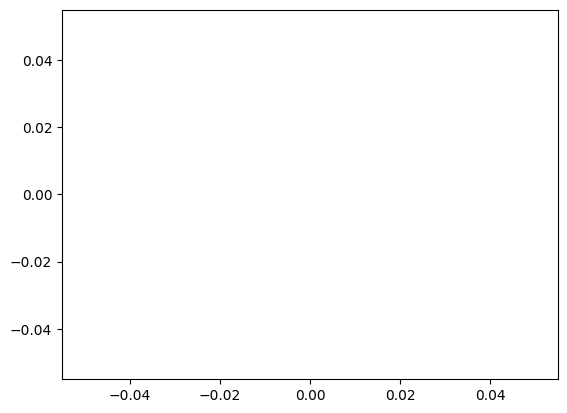

In [117]:
# TODO: get heights
heights = []

plt.plot(heights, "bo", markersize=2)
plt.show()

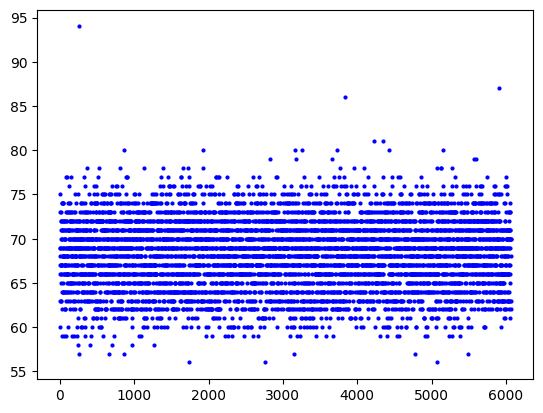

In [118]:
# TODO: get heights
heights = []

for p in ahws:
  heights.append(p[1])

plt.plot(heights, "bo", markersize=2)
plt.show()

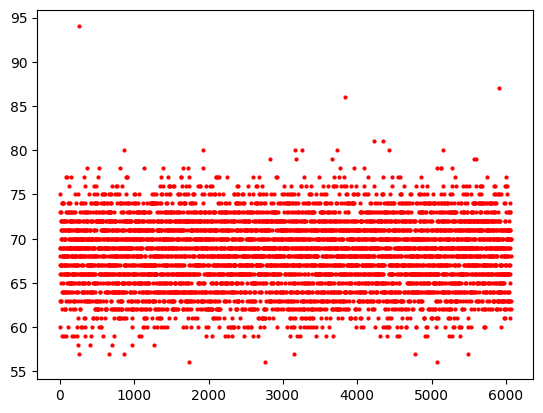

In [119]:
# TODO: get weights
weights = []

plt.plot(heights, "ro", markersize=2)
plt.show()

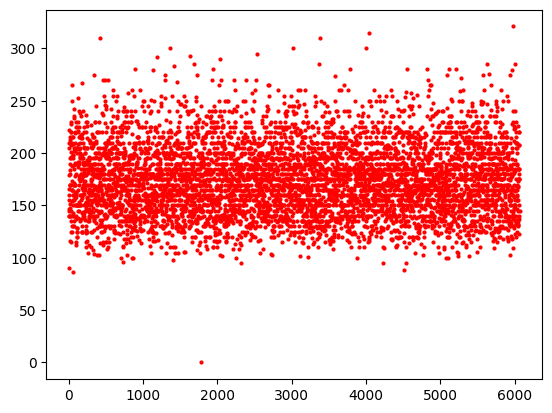

In [120]:
# TODO: get weights
weights = []

for p in ahws:
  weights.append(p[2])

plt.plot(weights, "ro", markersize=2)
plt.show()

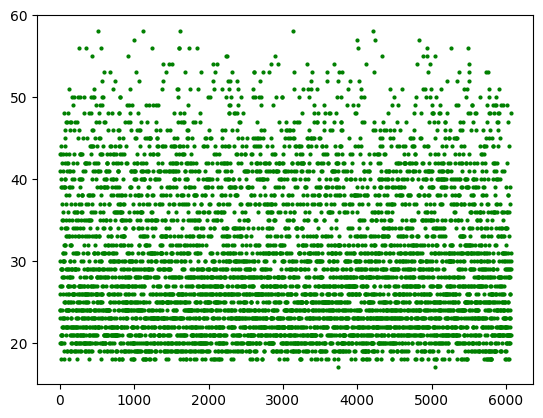

In [122]:
# TODO: plot ages in green
ages = []

for p in ahws:
  ages.append(p[0])

plt.plot(ages, "go", markersize=2)
plt.show()

### Matplotlib has memory/state

We can plot multiple lists at once by calling `plot()` repeatedly before displaying the accumulated graph with `show()`.


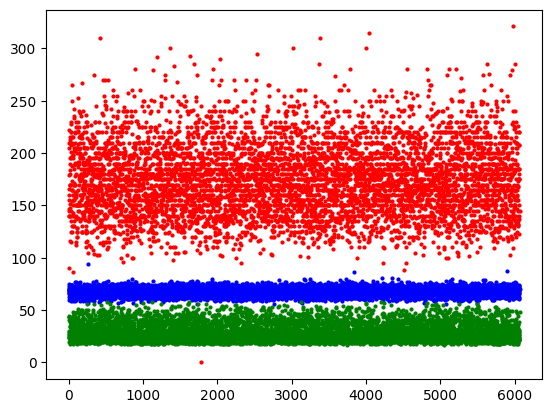

In [123]:
plt.plot(heights, "bo", markersize=2)
plt.plot(weights, "ro", markersize=2)
plt.plot(ages, "go", markersize=2)

plt.show()

### Sorting data can give a different perspective

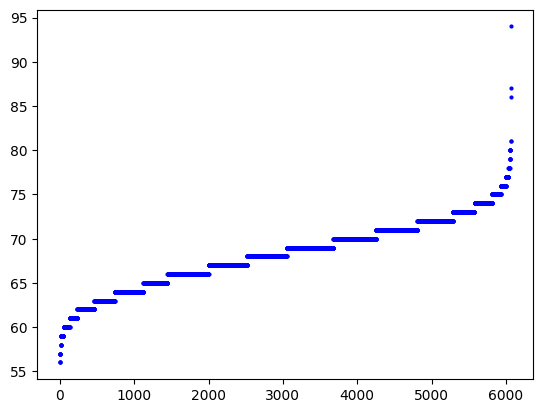

In [124]:
sorted_heights = sorted(heights)
plt.plot(sorted_heights, "bo", markersize=2)
plt.show()

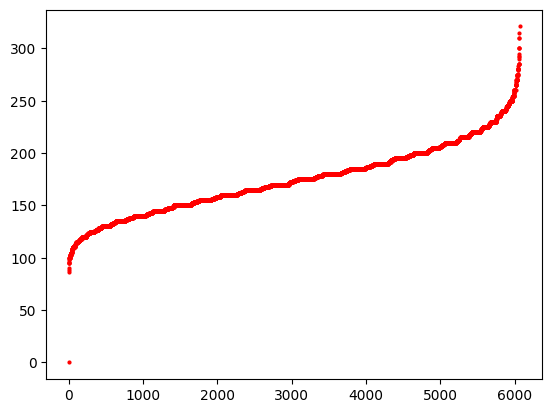

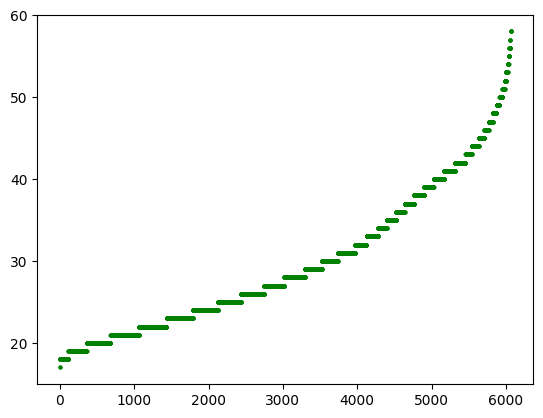

In [125]:
# TODO: repeat for weight and age

sorted_weights = sorted(weights)
plt.plot(sorted_weights, "ro", markersize=2)
plt.show()

sorted_ages = sorted(ages)
plt.plot(sorted_ages, "go", markersize=2)
plt.show()

### Histograms

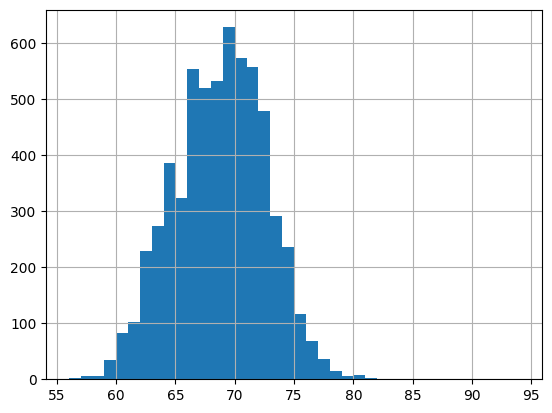

In [126]:
min_height = min(heights)
max_height = max(heights)
plt.hist(heights, bins=range(min_height, max_height + 1))
plt.grid()
plt.show()

## Correlation

Measurement of how $2$ independent variables (features) are related to each other.

<img src="./imgs/correlation.jpg" width="800px" />

They can have *positive* or *direct* correlation, if an increase in one of the variables comes with an increase in the other.

They can have *negative* or *inverse* correlation if an increase in one of the variables is accompanied by a decrease in the other.

Or, there can be *weak* or *NO* correlation, if a change in one variable doesn't seem to be accompanied by a change in the other.

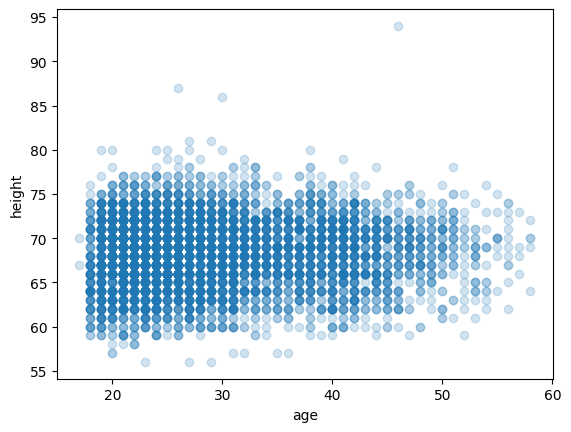

In [127]:
# use "column" lists from above to plot scatter plot
plt.scatter(ages, heights, marker="o", alpha=0.2)
plt.xlabel("age")
plt.ylabel("height")
plt.show()

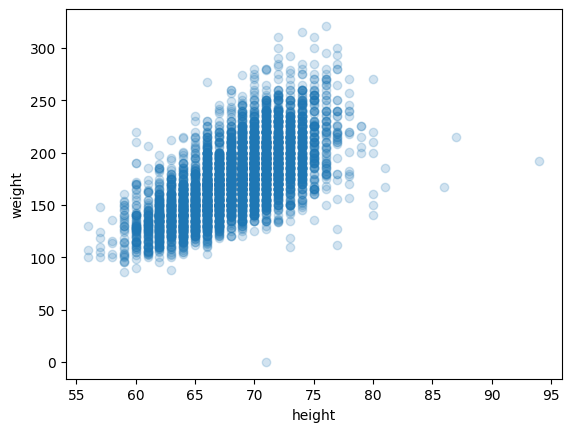

In [128]:
# TODO plot other combinations of variables
# TODO: any correlation ?

plt.scatter(heights, weights, marker="o", alpha=0.2)

plt.xlabel("height")
plt.ylabel("weight")
plt.show()

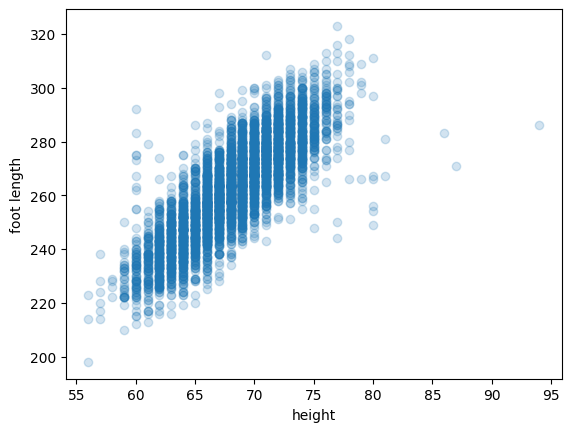

In [129]:
# TODO plot other combinations of variables

heights = []
foot_lengths = []

for p in ansur:
  heights.append(p["height"])
  foot_lengths.append(p["foot"]["length"])

plt.scatter(heights, foot_lengths, marker="o", alpha=0.2)

plt.xlabel("height")
plt.ylabel("foot length")
plt.show()

## Extra Practice

### Traversing a list of objects/dictionaries

This next cell creates a list of $1000$ objects with the following keys/parameters:

```py
{
  "id": "abc1234",
  "zip": 10001,
  "grades": [70, 81, 92, 84, 89],
  "attendance": [True, False, True, ....]
}
```

The `id` field is a string made up of $3$ letters and $4$ numbers; `zip` is a NYC area zip code; `grades` is a list of $5$ grades between $0$ and $100$; and `attendance` is a list of `15` boolean values.

In [130]:
import random
import string

from matplotlib import pyplot as plt

In [131]:
data = []

for cnt in range(1000):
  id_let = random.choices(string.ascii_lowercase, k=3)
  id_num = random.choices(string.digits, k=4)
  id_str = "".join(id_let + id_num)
  att = random.choices([True, True, True, True, True, False], k=15)
  grades = [min(100, random.gauss(93-3*(len(att)-sum(att)), 5)) for g in range(5)]
  data.append({
    "id": id_str,
    "zip": random.randint(10001, 11250),
    "grades": grades,
    "attendance": att
  })

We can check the length of the list, the contents of its first item, and its keys, with:

In [132]:
display(len(data))
display(data[0])
display(data[0].keys())

1000

{'id': 'zpl6538',
 'zip': 10301,
 'grades': [90.56326440783309,
  83.0236840895269,
  82.76997736437627,
  81.12425047728966,
  74.6285662922053],
 'attendance': [True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True]}

dict_keys(['id', 'zip', 'grades', 'attendance'])

### Plot: Grade vs Attendance

Let's see if someone's attendance has an effect on their grade.

We'll want to eventually plot average grade vs average attendance, but let's start simple.

Let's plot all of the students's first assignment grade, versus their first attendance.

We have to go through the list of objects/dicts and extract the first assignment grade and first attendance into separate lists of grades and attendances.

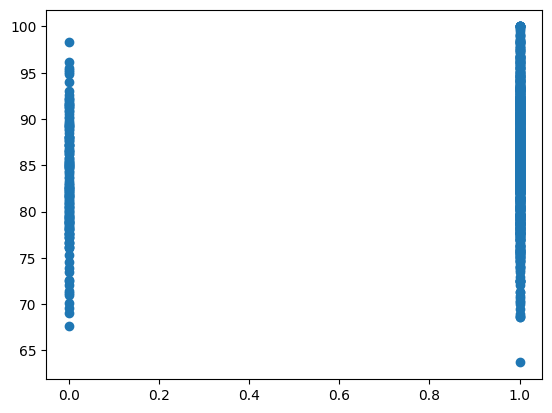

In [137]:
grades = []
attendances = []

for d in data:
  # TODO: append first grade to list
  grades.append(d["grades"][0])
  # TODO: append first attendance to list
  attendances.append(d["attendance"][0])

plt.plot(attendances, grades, "o")
plt.show()

### Plot: Grade vs Attendance

Now let's plot average grade versus total attendance.

The logic is the same, but instead of just appending the first grade/attendance, we'll push average grade and sum of the attendance values.

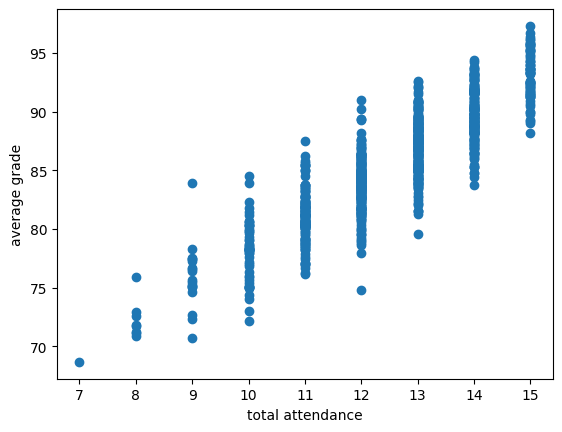

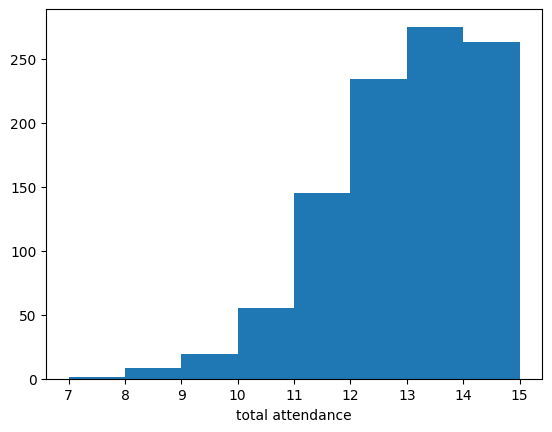

In [138]:
grade_avgs = []
attendance_sums = []

for d in data:
  # TODO: append average grade to list
  grade_avgs.append(sum(d["grades"]) / len(d["grades"]))
  # TODO: append average attendance to list
  attendance_sums.append(sum(d["attendance"]))

plt.plot(attendance_sums, grade_avgs, "o")
plt.xlabel("total attendance")
plt.ylabel("average grade")
plt.show()

plt.hist(attendance_sums, bins=8)
plt.xlabel("total attendance")
plt.show()